# IMPORT LIBRARIES & DATA


In [4]:
import sys
sys.path.append('../src') 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from GA import solve


In [ ]:
distance_df = pd.read_csv('../data/HN_distance_matrix.csv.csv', index_col=0)
distance_matrix = distance_df.values

# Kiểm tra sơ bộ
print("Số thành phố:", distance_matrix.shape[0])
print("Ví dụ khoảng cách [0][1]:", distance_matrix[0][1])


Số thành phố: 20
Ví dụ khoảng cách [0][1]: 23.36


# RUN

In [13]:
def detect_convergence(generation_fitness, tolerance=1e-3, window=5):
    for i in range(len(generation_fitness) - window):
        window_values = generation_fitness[i:i+window]
        if max(window_values) - min(window_values) < tolerance:
            return i + window
    return len(generation_fitness)


=== Số người (m) = 1 ===
Tổng quãng đường: 97.42
Tuyến dài nhất (fitness): 97.42
Chênh lệch giữa các tuyến (Balance metric): 0.00
Thời gian thực thi: 97.4117 giây
Số vòng lặp để hội tụ: 11
Tốc độ hội tụ: 4.6100 đơn vị/gen
 - Tuyến 1 (97.42): [0, 13, 19, 6, 14, 8, 15, 10, 18, 1, 16, 12, 2, 3, 4, 5, 9, 17, 7, 11, 0]


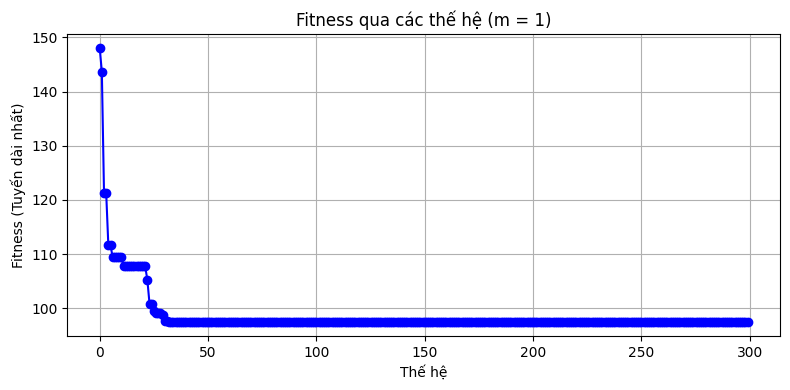


=== Số người (m) = 2 ===
Tổng quãng đường: 134.53
Tuyến dài nhất (fitness): 67.41
Chênh lệch giữa các tuyến (Balance metric): 0.29
Thời gian thực thi: 181.7277 giây
Số vòng lặp để hội tụ: 15
Tốc độ hội tụ: 2.1067 đơn vị/gen
 - Tuyến 1 (67.12): [0, 5, 7, 17, 6, 14, 8, 4, 9, 11, 13, 0]
 - Tuyến 2 (67.41): [0, 19, 15, 10, 3, 2, 12, 16, 1, 18, 0]


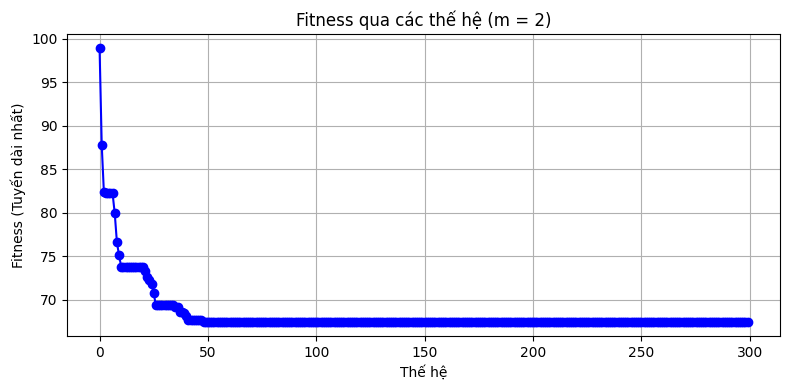


=== Số người (m) = 3 ===


In [ ]:

for m in range(1, 4):
    print(f"\n=== Số người (m) = {m} ===")

    start_time = time.time()
    total_distance, routes, fitness, fitness_per_generation = solve(distance_matrix, m)
    end_time = time.time()

    exec_time = end_time - start_time

    # Tính độ dài từng tuyến để đánh giá
    route_distances = [
        sum(distance_matrix[r[i]][r[i+1]] for i in range(len(r)-1))
        for r in routes
    ]
    max_len = max(route_distances)
    min_len = min(route_distances)
    balance_metric = max_len - min_len

    # Phân tích hội tụ
    converged_gen = detect_convergence(fitness_per_generation)
    convergence_speed = (fitness_per_generation[0] - fitness_per_generation[-1]) / converged_gen if converged_gen else 0

    # In kết quả
    print(f"Tổng quãng đường: {total_distance:.2f}")
    print(f"Tuyến dài nhất (fitness): {fitness:.2f}")
    print(f"Chênh lệch giữa các tuyến (Balance metric): {balance_metric:.2f}")
    print(f"Thời gian thực thi: {exec_time:.4f} giây")
    print(f"Số vòng lặp để hội tụ: {converged_gen}")
    print(f"Tốc độ hội tụ: {convergence_speed:.4f} đơn vị/gen")

    for i, r in enumerate(routes):
        print(f" - Tuyến {i+1} ({route_distances[i]:.2f}): {r}")

    # Vẽ biểu đồ fitness
    plt.figure(figsize=(8, 4))
    plt.plot(fitness_per_generation, marker='o', linestyle='-', color='blue')
    plt.title(f"Fitness qua các thế hệ (m = {m})")
    plt.xlabel("Thế hệ")
    plt.ylabel("Fitness (Tuyến dài nhất)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()